## Follow Steps found in 
 - https://towardsdatascience.com/natural-language-processing-dependency-parsing-cf094bbbe3f7
 ### A list of NLP libraries that can be used 
 - https://medium.com/@soffosdotai/top-7-python-nlp-libraries-and-their-applications-in-2023-bd0c4395851b
 

## Genius access token 
client ID: YNiczFFSCq1ZrNpdWaasGqGPG03cxe8drkbwv5b41MA-TXZiZqQehT_NjpyUGRMu
client secret: 1UzBNab_mGL4ICeMdMj32EiwfmPtGsZDYMBckFKT-irCdFIJUVf01kKhsgLptuT_jpcAdbi4A1OlzI_sLvaLxQ
client access token: AcU_KX10e5nyufSsdSw9vwAf12Vox91khaxz0BH-5oIP9G6pu_RoyS4ojUUocy8V

### Things to do
- a function to Isolate the lyrics into sentence fragmetns 
- a function to create your own tokens (maybe help with the lap lyric contextualization)
- a function that runs the nlp pipeline, either your own token or a built in one
- Figure out the data structure for the output and how that can help in sending the output for humdrum, maybe just a json can be helpful in the same way we make the table? read up on that 
- Convert to a humdrum stem

In [14]:
import lyricsgenius
from lyricsgenius import Genius
token = 'AcU_KX10e5nyufSsdSw9vwAf12Vox91khaxz0BH-5oIP9G6pu_RoyS4ojUUocy8V'
genius = Genius(token)
genius.response_format = 'plain,html'
artist = genius.search_artist("Eminem", max_songs=0, sort="title")
song = genius.search_song("Not Afraid", artist.name)


print(song.lyrics)

Searching for songs by Eminem...

Done. Found 0 songs.
Searching for "Not Afraid" by Eminem...
Done.
358 ContributorsTranslationsPortuguêsItalianoΕλληνικάFrançaisNot Afraid Lyrics[Chorus]
I'm not afraid (I'm not afraid)
Yeah
To take a stand (To take a stand)
It's been a ride
Everybody (Everybody)
I guess I had to
Come take my hand (Come take my hand)
Go to that place to get to this one
We'll walk this road together, through the storm
Now some of you
Whatever weather, cold or warm
Might still be in that place
Just lettin' you know that you're not alone
If you're tryna get out
Holla if you feel like you've been down the same road
Just follow me, I'll get you there

[Verse 1]
You can try and read my lyrics off of this paper before I lay 'em
But you won't take the sting out these words before I say 'em
'Cause ain't no way I'ma let you stop me from causin' mayhem
When I say I'ma do somethin', I do it, I don't give a damn what you think
I'm doin' this for me, so fuck the world
Feed it beans,

In [5]:
!pip install lyricsgenius

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 530.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Using custom tokenization can help!

In [12]:
print ("{:<15} | {:<10} | {:<15} ".format('Token', 'Relation', 'Head'))

Token           | Relation   | Head            


In [1]:
import stanza

# Download the language model
stanza.download('en')

sentence = 'Deemed universities charge huge fees'

# Build a Neural Pipeline
nlp = stanza.Pipeline('en', processors = "tokenize,mwt,pos,lemma,depparse") 

# Pass the sentence through the pipeline
doc = nlp(sentence)

# Print the dependencies of the first sentence in the doc object
# Format - (Token, Index of head, Nature of dependency)
# Index starts from 1, 0 is reserved for ROOT
doc.sentences[0].print_dependencies()


print ("{:<15} | {:<10} | {:<15} ".format('Token', 'Relation', 'Head'))
print ("-" * 50)
  
# Convert sentence object to dictionary  
sent_dict = doc.sentences[0].to_dict()

# iterate to print the token, relation and head
for word in sent_dict:
  print ("{:<15} | {:<10} | {:<15} "
         .format(str(word['text']),str(word['deprel']), str(sent_dict[word['head']-1]['text'] if word['head'] > 0 else 'ROOT')))

2024-01-23 22:50:18 INFO: Downloading default packages for language: en (English) ...
2024-01-23 22:50:19 INFO: File exists: /Users/noelalben/stanza_resources/en/default.zip
2024-01-23 22:50:22 INFO: Finished downloading models and saved to /Users/noelalben/stanza_resources.
2024-01-23 22:50:22 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-01-23 22:50:23 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2024-01-23 22:50:23 INFO: Using device: cpu
2024-01-23 22:50:23 INFO: Loading: tokenize
2024-01-23 22:50:23 INFO: Loading: mwt
2024-01-23 22:50:23 INFO: Loading: pos
2024-01-23 22:50:24 INFO: Loading: lemma
2024-01-23 22:50:24 INFO: Loading: depparse
2024-01-23 22:50:24 INFO: Done loading processors!


('Deemed', 2, 'amod')
('universities', 3, 'nsubj')
('charge', 0, 'root')
('huge', 5, 'amod')
('fees', 3, 'obj')
Token           | Relation   | Head            
--------------------------------------------------
Deemed          | amod       | universities    
universities    | nsubj      | charge          
charge          | root       | ROOT            
huge            | amod       | fees            
fees            | obj        | charge          


In [1]:
from nltk.parse.stanford import StanfordDependencyParser
import nltk
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
models_jar_path = '/Users/noelalben/github/RapDependency/stanford-corenlp-4.2.2-models-english.jar'
jar_path = '/Users/noelalben/github/RapDependency/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2-models.jar'

In [3]:
sentence = "You can't deny that when a girl walks in you get excited"

In [4]:
def Parsing(sentence, jar_path,path_to_models_jar):
    parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)
    result = parser.raw_parse(sentence)
    dependency = result.__next__()
    print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
    print ("-" * 75)
    for dep in list(dependency.triples()):
          print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))
    

In [5]:
Parsing(sentence, jar_path,models_jar_path)

/var/folders/td/wr0v_l5j16bgp1cvydp7pmqc0000gn/T/ipykernel_42777/2588957925.py:2: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)


Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
deny            | VB         | nsubj      | You             | PRP       
deny            | VB         | aux        | ca              | MD        
deny            | VB         | advmod     | n't             | RB        
deny            | VB         | obj        | that            | DT        
deny            | VB         | advcl      | walks           | VBZ       
walks           | VBZ        | advmod     | when            | WRB       
walks           | VBZ        | nsubj      | girl            | NN        
girl            | NN         | det        | a               | DT        
walks           | VBZ        | obl        | you             | PRP       
you             | PRP        | case       | in              | IN        
deny            | VB         | dep        | excited         | JJ        
excited         | JJ         | dep        | g

In [6]:
def networkX(sentence, jar_path,path_to_models_jar):
    parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)
    result = parser.raw_parse(sentence)
    dependency = result.__next__()
    G = dependency.nx_graph().reverse()
    words = sentence.split(" ")
    labels = {index + 1: words[index] for index in range(len(words))}
    nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)
    

/var/folders/td/wr0v_l5j16bgp1cvydp7pmqc0000gn/T/ipykernel_42777/3941199874.py:2: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)


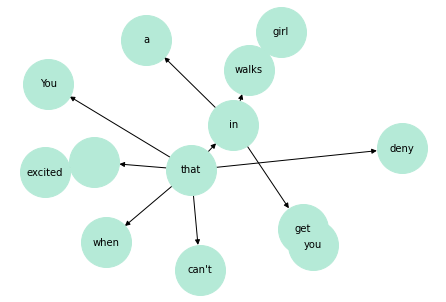

In [7]:
networkX(sentence, jar_path,models_jar_path)

In [27]:
G = dependency.nx_graph().reverse()

In [28]:
words = sentence.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}

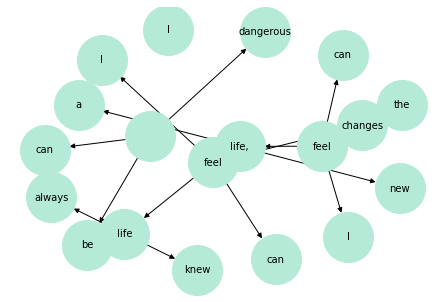

In [29]:
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)

In [30]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 KB 1.3 MB/s eta 0:00:00


In [32]:
from graphviz import Source
dot_def = dependency.to_dot()
'''
The below lines require graphviz executables to be installed to your system. If that does not work, print the dot_def object and paste the output on http://graphs.grevian.org/graph/
'''
print(dot_def)
# source = Source(dot_def, filename="dependency_graph", format="png")
# source.view()

TypeError: '<' not supported between instances of 'NoneType' and 'int'